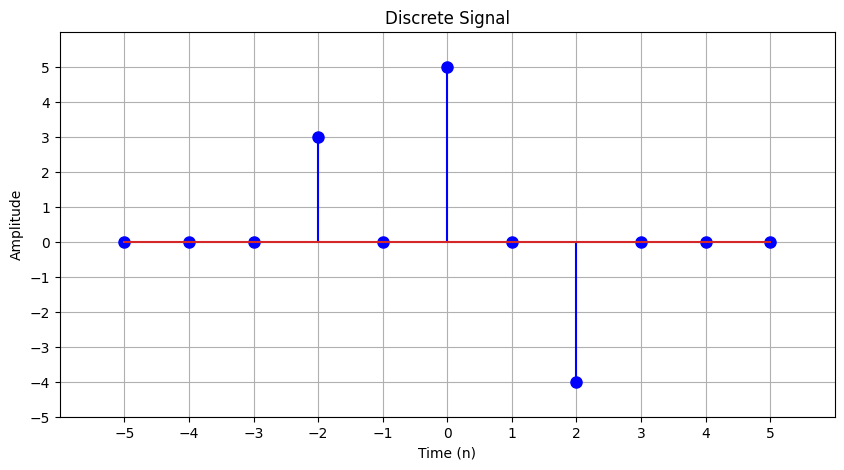

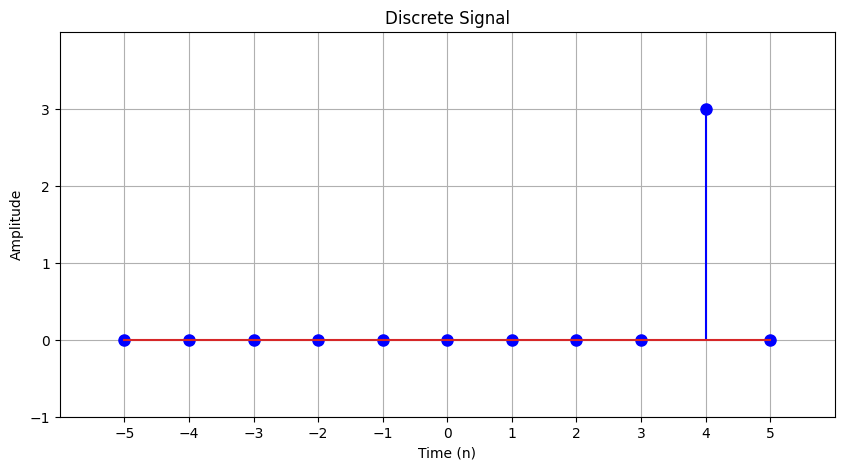

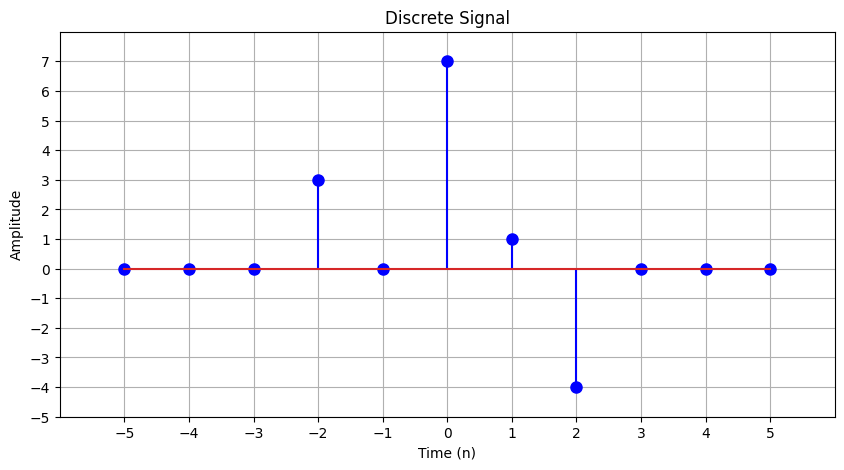

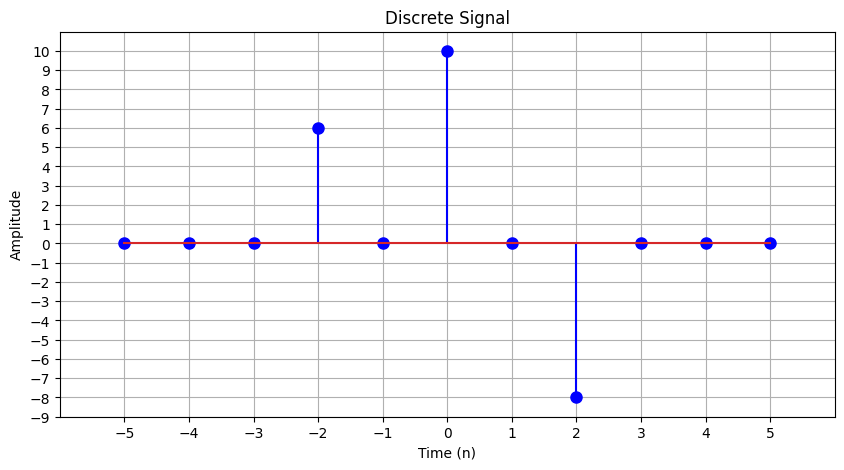

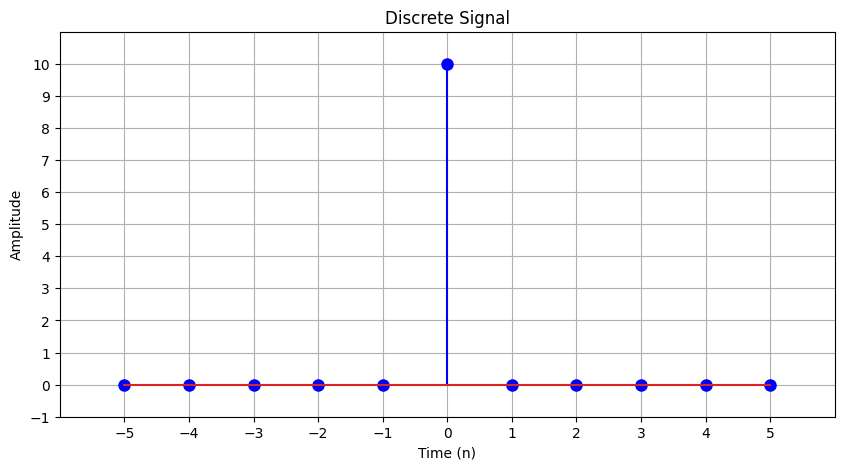

In [9]:
import numpy as np
import matplotlib.pyplot as plt


class DiscreteSignal:
    def __init__(self, INF):
        self.INF=INF
        self.values= np.zeros(2*INF + 1)
        
    def set_value_at_time(self, time, value):
        if time>self.INF or time<-self.INF:
            print("Input Out Of Bound!")
        else:    
            self.values[time+self.INF]=value
            
    def shift_signal(self, shift):    
        new_signal = DiscreteSignal(self.INF) 
        new_signal.values= np.roll(self.values, shift)   
        if shift > 0:
            new_signal.values[:shift] = 0
        elif shift < 0:
            new_signal.values[shift:] = 0
        return new_signal
    
    def add(self, other):
        new_signal = DiscreteSignal(self.INF)
        new_signal.values= other.values+self.values
        return new_signal
    
    def multiply(self, other):
        new_signal = DiscreteSignal(self.INF)
        new_signal.values= other.values*self.values
        return new_signal
    
    def multiply_const_factor(self, scaler):
        new_signal = DiscreteSignal(self.INF)
        new_signal.values= scaler*self.values
        return new_signal
    
    def plot(self):
        time = np.arange(-self.INF, self.INF + 1)
    
        plt.figure(figsize=(10, 5))
    
        markerline, stemlines, baseline = plt.stem(time, self.values)
    
        plt.setp(markerline, markersize=8, color='blue')
        plt.setp(stemlines, color='blue', linewidth=1.5)
        plt.setp(baseline, visible=True)  

        plt.xlim([-self.INF - 1, self.INF + 1])
        plt.ylim([min(self.values) - 1, max(self.values) + 1])

        plt.xticks(np.arange(-self.INF, self.INF + 1, 1))
        plt.yticks(np.arange(min(self.values) - 1, max(self.values) + 1))

        plt.grid(True)

        plt.title('Discrete Signal')
        plt.xlabel('Time (n)')
        plt.ylabel('Amplitude')

        plt.show()

    
# signal = DiscreteSignal(INF=5)

# # Set values at specific times
# signal.set_value_at_time(-2, 3)
# signal.set_value_at_time(0, 5)
# signal.set_value_at_time(2, -4)

# # Shift the signal by +1
# shifted_signal = signal.shift_signal(6)

# # # Plot the original and shifted signals
# signal.plot()
# shifted_signal.plot()


# # # Create another signal and add it to the first
# signal2 = DiscreteSignal(INF=5)
# signal2.set_value_at_time(0, 2)
# signal2.set_value_at_time(1, 1)

# # Add signals
# added_signal = signal.add(signal2)
# added_signal.plot()

# # Multiply by a constant
# scaled_signal = signal.multiply_const_factor(2)
# scaled_signal.plot()

# # Multiply two signals element-wise
# multiplied_signal = signal.multiply(signal2)
# multiplied_signal.plot()



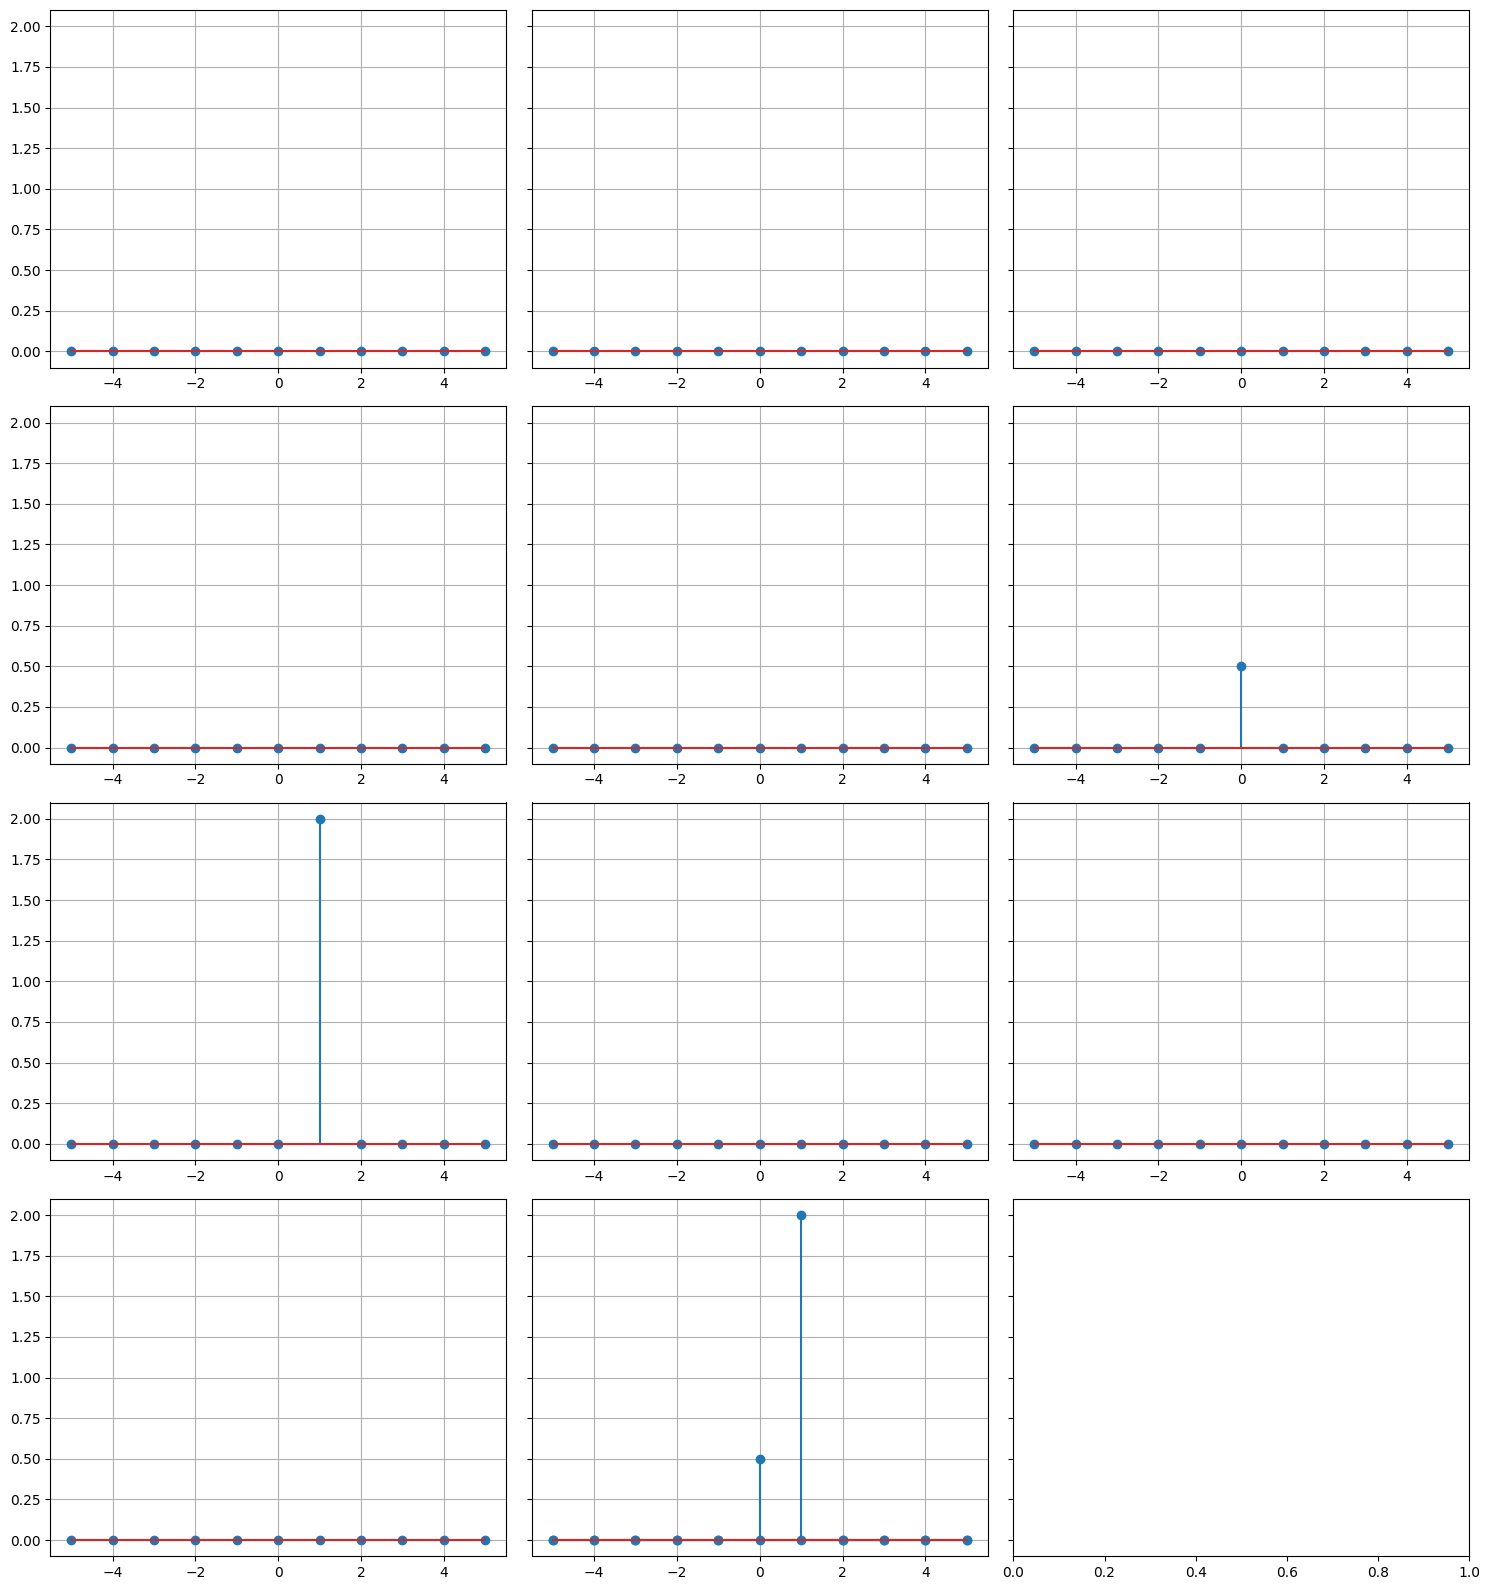

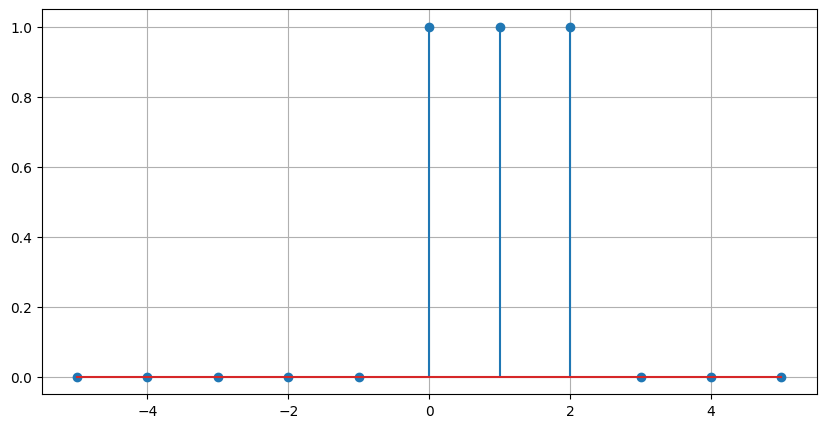

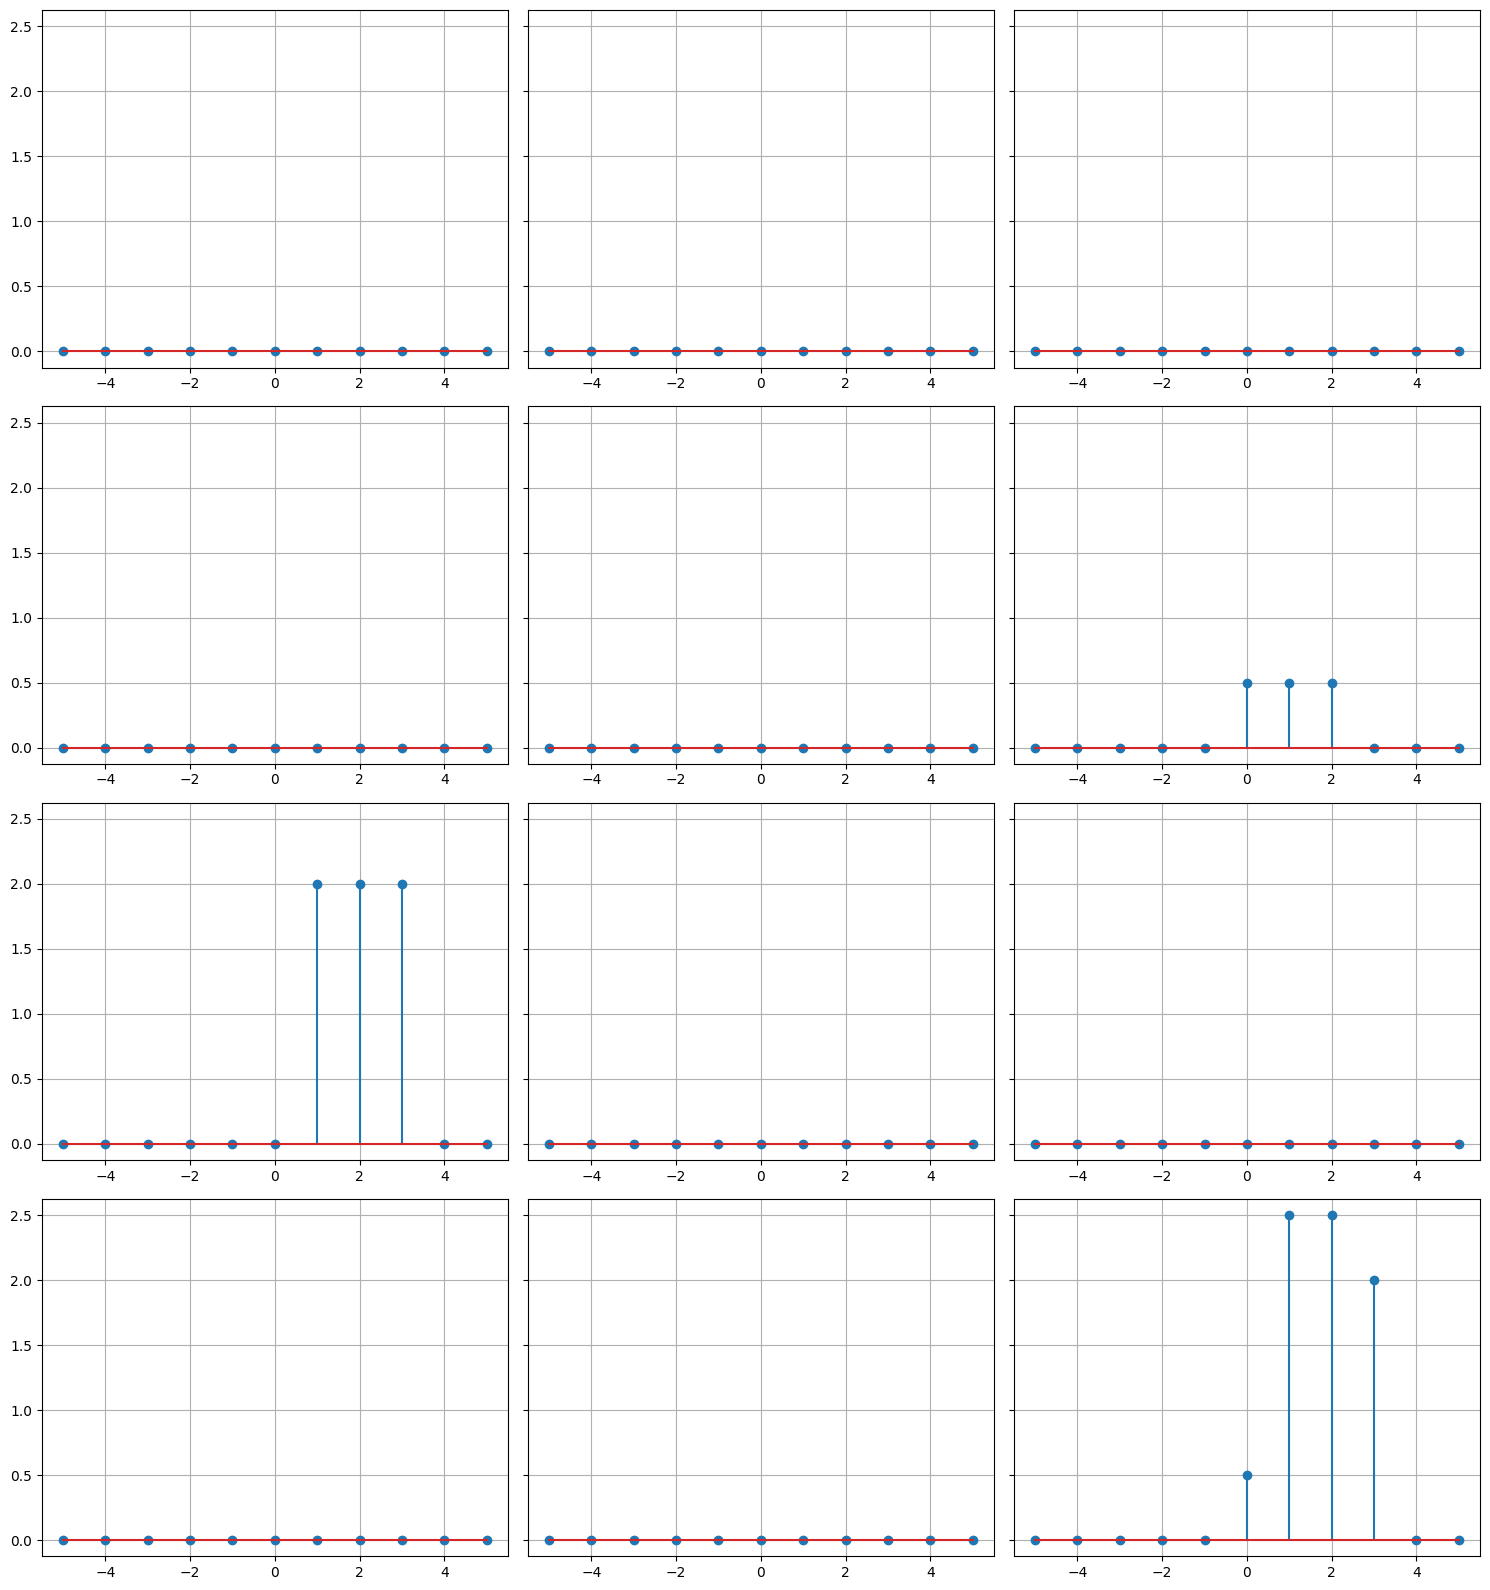

In [21]:
#import import_ipynb
import numpy as np
import matplotlib.pyplot as plt


class DiscreteLinearTimeInvariantSystem:
    def __init__(self, impulse_response):
        self.impulse_response = impulse_response

    def linear_combination_of_impulses(self, input_signal):
        impulses = []
        coefficients = []
        for t in range(-self.impulse_response.INF, self.impulse_response.INF + 1):
            coeff = input_signal.values[t + self.impulse_response.INF]
            unit_impulse = DiscreteSignal(self.impulse_response.INF)
            unit_impulse.set_value_at_time(t, 1)
            impulses.append(unit_impulse)
            coefficients.append(coeff)
        return impulses, coefficients

    def output(self, input_signal):
        output_signal = DiscreteSignal(self.impulse_response.INF)
        impulses, coefficients = self.linear_combination_of_impulses(input_signal)
        
        for i in range(len(impulses)):
            shifted_response = self.impulse_response.shift_signal(impulses[i].values.argmax() - self.impulse_response.INF)
            scaled_response = shifted_response.multiply_const_factor(coefficients[i])
            output_signal = output_signal.add(scaled_response)
        
        return output_signal

#------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

INF=5
impulse_response = DiscreteSignal(INF)
impulse_response.set_value_at_time(0, 1)  
impulse_response.set_value_at_time(1, 1)  
impulse_response.set_value_at_time(2, 1) 

input_signal = DiscreteSignal(INF)

input_signal.set_value_at_time(0, 0.5)
input_signal.set_value_at_time(1, 2)

lti_system = DiscreteLinearTimeInvariantSystem(impulse_response)

impulses, coefficients = lti_system.linear_combination_of_impulses(input_signal)

num_impulses = len(impulses) 

n_cols = 3  
n_rows = (num_impulses + n_cols - 1) // n_cols  


fig, axs = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4), sharey=True)

axs = axs.flatten()

for i, impulse in enumerate(impulses):
    scaled_impulse = impulse.multiply_const_factor(coefficients[i])
    time = np.arange(-impulse.INF, impulse.INF + 1)  
    
    axs[i].stem(time, scaled_impulse.values) 
    axs[i].grid(True)
    
sum_impulse = DiscreteSignal(impulse_response.INF)
for i, impulse in enumerate(impulses):
    sum_impulse = sum_impulse.add(impulse.multiply_const_factor(coefficients[i]))
    
time = np.arange(-input_signal.INF, input_signal.INF + 1)
axs[-2].stem(time, input_signal.values)
axs[-2].grid(True)

plt.tight_layout()
plt.show()

#--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

time = np.arange(-impulse_response.INF, impulse_response.INF + 1)
    
plt.figure(figsize=(10, 5))

plt.stem(time, impulse_response.values)

plt.grid(True)

#------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


output_signal = lti_system.output(input_signal)

num_impulses = len(impulses)

n_cols = 3  
n_rows = (num_impulses + n_cols - 1) // n_cols  


fig, axs = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4), sharey=True)

axs = axs.flatten()

for i, impulse in enumerate(impulses):
    scaled_response = impulse_response.shift_signal(impulse.values.argmax() - impulse_response.INF)
    scaled_response = scaled_response.multiply_const_factor(coefficients[i])
    
    time = np.arange(-scaled_response.INF, scaled_response.INF + 1)
    axs[i].stem(time, scaled_response.values)
    axs[i].grid(True)

time = np.arange(-output_signal.INF, output_signal.INF + 1)
axs[num_impulses].stem(time, output_signal.values)
axs[num_impulses].grid(True)

plt.tight_layout()
plt.show()
